# About

Pada projek kali ini akan membuat sebuah Sentiment Analysis dan Emsosi terhadap pelayanan Rumah Sakit di Kota Semarang,
dataset diambil dari ulasan Google Maps

# Import Library

In [ ]:
!pip install Sastrawi
!pip install tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
!pip install git+https://github.com/adbar/simplemma

  Cloning https://github.com/adbar/simplemma to /tmp/pip-req-build-e8nxe9fi
  Running command git clone --filter=blob:none --quiet https://github.com/adbar/simplemma /tmp/pip-req-build-e8nxe9fi
  Resolved https://github.com/adbar/simplemma to commit 23eecbaf68c6080860db8fe6d4c51784aa40d627
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for simplemma: filename=simplemma-1.1.2-py3-none-any.whl size=67520935 sha256=dbceb8c2bc5a9966acf815b24126198dfbeaa30000fcdba7eba99fc34e46ec9e
  Stored in directory: /tmp/pip-ephem-wheel-cache-wsawn1vy/wheels/c9/1a/c4/f211ef1fd192c4829e473092ecd75745945811ddb7e81bb40a
Successfully built simplemma


In [ ]:
import simplemma
from simplemma import text_lemmatizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer
from spacy.lang.id.stop_words import STOP_WORDS

from tqdm import tqdm
tqdm.pandas()

import csv
import requests
from io import StringIO

#Modelling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.feature_extraction.text import CountVectorizer


from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

# Data Loading

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TA - Sentimen Analysis dan Opini Ulasan Rumah Sakit/new/dataset_rs.csv', delimiter=';')
df.head()

,id_rs,rumah_sakit,tipe_rs,nama,ulasan
0,3374123,RS Dr. Amino Gondohutomo,A,bam Rustano,Dokter untu og ngamukan
1,3374123,RS Dr. Amino Gondohutomo,A,Nike Dewanti,"Setelah saya berkonsultasi dengan yg lebih profesional, saya sangat terbantu. Saya mendapat pemahaman yang lebih baik 🥹 …"
2,3374123,RS Dr. Amino Gondohutomo,A,Claudia Noviantiy,Pelayanan sangat memuaskan
3,3374123,RS Dr. Amino Gondohutomo,A,Ma'ruf Aji Nugroho,Itu keren
4,3374123,RS Dr. Amino Gondohutomo,A,Muhammad Yuga Syahputra,Nais banget!!


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16346 entries, 0 to 16345
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_rs        16346 non-null  int64 
 1   rumah_sakit  16346 non-null  object
 2   tipe_rs      16346 non-null  object
 3   nama         16346 non-null  object
 4   ulasan       16346 non-null  object
dtypes: int64(1), object(4)
memory usage: 638.6+ KB


In [ ]:
df.shape

(16346, 5)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['rumah_sakit'].value_counts()

,count
rumah_sakit,
RS Sultan Agung,1485
RSUD Wongsonegoro,1416
RS St. Elisabeth Semarang,1268
RS Primaya,1125
RS Panti Wilasa,1070
RS Hermina Pandanaran,939
RS Panti Wilasa II,917
RSUP Dr. Kariadi,917
RS Muhammadiyah Roemani,893


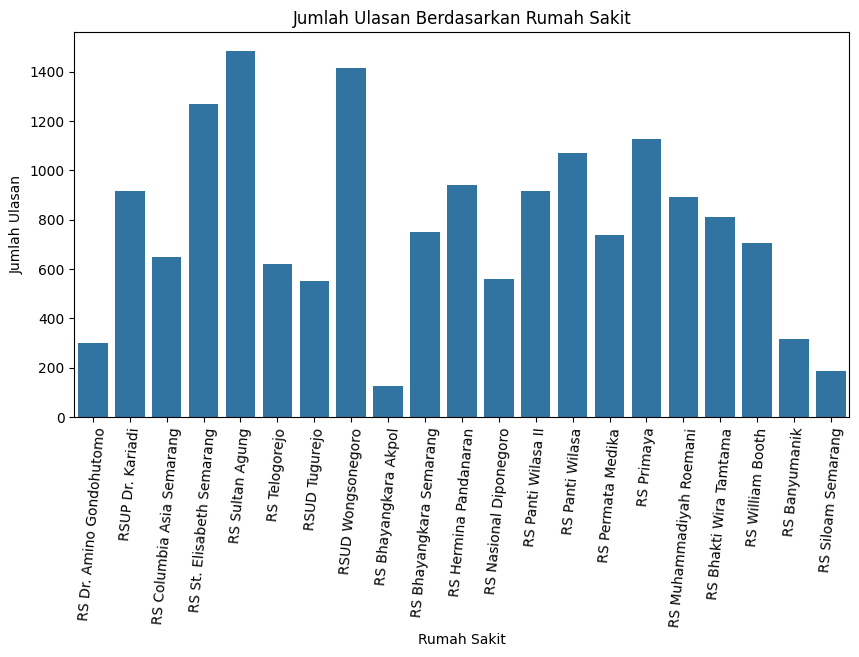

In [ ]:
# Plot berdasarkan Rumah Sakit
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rumah_sakit')
plt.title('Jumlah Ulasan Berdasarkan Rumah Sakit')
plt.xlabel('Rumah Sakit')

plt.xticks(rotation=85)

plt.ylabel('Jumlah Ulasan')
plt.show()

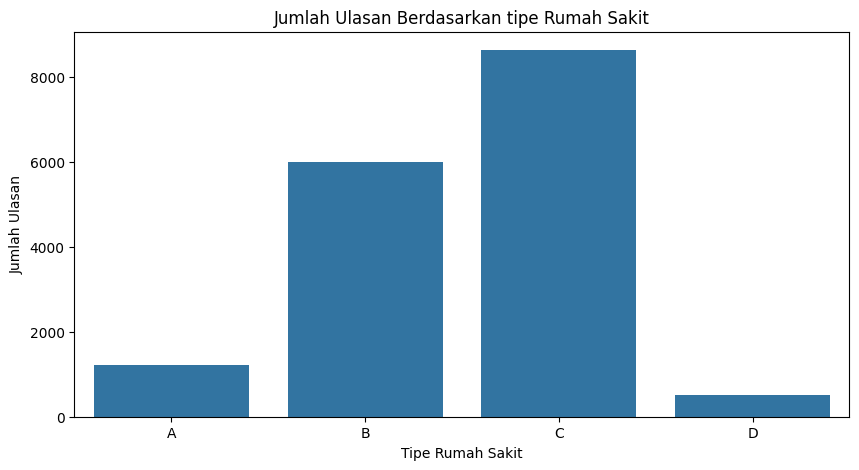

In [ ]:
# Plot Berdasrkan tipe Rumah Sakit
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='tipe_rs')
plt.title('Jumlah Ulasan Berdasarkan tipe Rumah Sakit')
plt.xlabel('Tipe Rumah Sakit')

plt.ylabel('Jumlah Ulasan')
plt.show()

# Preprocessing


## Drop Duplicate

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

## Drop Data Kosong

In [ ]:
df.isna().sum()

,0
id_rs,0
rumah_sakit,0
tipe_rs,0
nama,0
ulasan,0


## Casefolding

Bertujuan untuk membersihkan data seperti menerapkan lower case , menghapus angka , menghapus simbol / tanda baca , dan menghapus awalan dan akhiran spasi

In [ ]:
def casefolding(text):
    text = text.lower()                     # merubah kalimat menjadi huruf kecil
    text = re.sub(r'[-+]?[0-9]+','',text)   # menghapus angka
    text = re.sub(r'[^\w\s]',' ',text)       # menghapus simbol dan tanda baca
    text = text.strip()                     # menghapus spasi awal dan akhir

    return text

In [ ]:
# Testing casefolding
raw_text = df.ulasan.iloc[3444]
text_casefolding = casefolding(raw_text)

print(f"Teks raw: ",raw_text)

print(f"Teks setelah casefolding: ",text_casefolding)

Teks raw:  Alhamdulillah,Terimakasih atas perawatan buat istri saya saat dirawat diruang Baitul Izzah 1,sangat puas dengan pelayanannya, dokter dan perawatnya baik,ramah,ruangan nyaman,bersih, Sukses selalu RSI Sultan agung Semarang.
Teks setelah casefolding:  alhamdulillah terimakasih atas perawatan buat istri saya saat dirawat diruang baitul izzah  sangat puas dengan pelayanannya  dokter dan perawatnya baik ramah ruangan nyaman bersih  sukses selalu rsi sultan agung semarang


## Tokenisasi

Merubah teks menjadi token token

In [ ]:
def tokenisasi(text):
  # Tokenisasi

  text = word_tokenize(text)

  return text

In [ ]:
# Tes tokenisasi

tokens = tokenisasi(text_casefolding)

print(f"Teks raw: ",raw_text)

print(f"Teks setelah casefolding: ",text_casefolding)

print(f"Teks setelah tokenisasi: ",tokens)


Teks raw:  Alhamdulillah,Terimakasih atas perawatan buat istri saya saat dirawat diruang Baitul Izzah 1,sangat puas dengan pelayanannya, dokter dan perawatnya baik,ramah,ruangan nyaman,bersih, Sukses selalu RSI Sultan agung Semarang.
Teks setelah casefolding:  alhamdulillah terimakasih atas perawatan buat istri saya saat dirawat diruang baitul izzah  sangat puas dengan pelayanannya  dokter dan perawatnya baik ramah ruangan nyaman bersih  sukses selalu rsi sultan agung semarang
Teks setelah tokenisasi:  ['alhamdulillah', 'terimakasih', 'atas', 'perawatan', 'buat', 'istri', 'saya', 'saat', 'dirawat', 'diruang', 'baitul', 'izzah', 'sangat', 'puas', 'dengan', 'pelayanannya', 'dokter', 'dan', 'perawatnya', 'baik', 'ramah', 'ruangan', 'nyaman', 'bersih', 'sukses', 'selalu', 'rsi', 'sultan', 'agung', 'semarang']


## Normalisasi

bertujuan untuk mengubah teks slang menjadi bentul normal / umum

In [ ]:
slang_dict = pd.read_csv('/content/drive/MyDrive/TA - Sentimen Analysis dan Opini Ulasan Rumah Sakit/new/new_kamusalay.csv', encoding='latin-1', header=None)

# Menambahkan Header
slang_dict = slang_dict.rename(columns={0: 'original', 1: 'replacement'})

slang_dict.tail()


,original,replacement
15169,nakes,tenaga kesehatan
15170,rontgen,radiologi
15171,poli,poliklinik
15172,cek up,pemeriksaan kesehatan
15173,igd,instalasi gawat darurat


In [ ]:
# Mengonversi kamus slang menjadi dictionary untuk pencarian yang lebih cepat
slang_dict = dict(zip(slang_dict['original'], slang_dict['replacement']))

def normalisasi(text):

  # Normalisasi kata-kata menggunakan kamus slang
  text = [slang_dict.get(text, text) for text in text]
  return text

In [ ]:
# Tes normalisasi

text_normalisasi = normalisasi(tokens)

print(f"Teks raw: ",raw_text)

print(f"Teks setelah casefolding: ",text_casefolding)

print(f"Teks setelah tokenisasi: ",tokens)

print(f"Teks setelah normalisasi: ",text_normalisasi)

Teks raw:  Alhamdulillah,Terimakasih atas perawatan buat istri saya saat dirawat diruang Baitul Izzah 1,sangat puas dengan pelayanannya, dokter dan perawatnya baik,ramah,ruangan nyaman,bersih, Sukses selalu RSI Sultan agung Semarang.
Teks setelah casefolding:  alhamdulillah terimakasih atas perawatan buat istri saya saat dirawat diruang baitul izzah  sangat puas dengan pelayanannya  dokter dan perawatnya baik ramah ruangan nyaman bersih  sukses selalu rsi sultan agung semarang
Teks setelah tokenisasi:  ['alhamdulillah', 'terimakasih', 'atas', 'perawatan', 'buat', 'istri', 'saya', 'saat', 'dirawat', 'diruang', 'baitul', 'izzah', 'sangat', 'puas', 'dengan', 'pelayanannya', 'dokter', 'dan', 'perawatnya', 'baik', 'ramah', 'ruangan', 'nyaman', 'bersih', 'sukses', 'selalu', 'rsi', 'sultan', 'agung', 'semarang']
Teks setelah normalisasi:  ['alhamdulillah', 'terima kasih', 'atas', 'perawatan', 'buat', 'istri', 'saya', 'saat', 'dirawat', 'diruang', 'baitul', 'izzah', 'sangat', 'puas', 'dengan',

## Lemmatization

Merubah kata kedalam bentuk dasar

In [ ]:
def lemmatize(text):
    text = ' '.join(text)
    text = text_lemmatizer(text, lang='id')
    text = ' '.join(text)
    return text

In [ ]:
# Tes lemmatization

text_lemmatized = lemmatize(text_normalisasi)

print(f"Teks raw: ",raw_text)

print(f"Teks setelah casefolding: ",text_casefolding)

print(f"Teks setelah normalisasi: ",text_normalisasi)

print(f"Teks setelah tokenisasi: ", tokens)

print(f"Teks setelah lemmatized: ",text_lemmatized)

Teks raw:  Alhamdulillah,Terimakasih atas perawatan buat istri saya saat dirawat diruang Baitul Izzah 1,sangat puas dengan pelayanannya, dokter dan perawatnya baik,ramah,ruangan nyaman,bersih, Sukses selalu RSI Sultan agung Semarang.
Teks setelah casefolding:  alhamdulillah terimakasih atas perawatan buat istri saya saat dirawat diruang baitul izzah  sangat puas dengan pelayanannya  dokter dan perawatnya baik ramah ruangan nyaman bersih  sukses selalu rsi sultan agung semarang
Teks setelah normalisasi:  ['alhamdulillah', 'terima kasih', 'atas', 'perawatan', 'buat', 'istri', 'saya', 'saat', 'dirawat', 'diruang', 'baitul', 'izzah', 'sangat', 'puas', 'dengan', 'pelayanannya', 'dokter', 'dan', 'perawatnya', 'baik', 'ramah', 'ruangan', 'nyaman', 'bersih', 'sukses', 'selalu', 'rsi', 'sultan', 'agung', 'semarang']
Teks setelah tokenisasi:  ['alhamdulillah', 'terimakasih', 'atas', 'perawatan', 'buat', 'istri', 'saya', 'saat', 'dirawat', 'diruang', 'baitul', 'izzah', 'sangat', 'puas', 'dengan',

## StopWord Removal


Menghapus kata kata umum yang tidak memiliki informatif


In [ ]:
from pickle import STOP
new_stopwords = ["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                 'kalo', 'amp', 'biar', 'bikin', 'bilang',
                 'gak', 'ga , ngga', 'krn', 'nya', 'nih', 'sih',
                 'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                 'jd', 'jgn', 'sdh', 'aja', 'n', 't','ngga',
                 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                 '&amp', 'yah',"nya","muas", "rumah", "sakit", "sultan", "agung",
                 'amino', 'dokter', 'rsud', 'pol', 'elisabeth', 'rs', 'semarang', 'rsi',
                 'pasien', 'baitul', 'izzah', 'rswn', 'rawat', 'pasien', 'primaya','setelah',
                 'saya', 'yang', 'rsjd', 'cipto', 'wa', 'dr'
                ]

stopwords_dict = stopwords.words('indonesian') + new_stopwords
stopwords_combined = STOP_WORDS.union(set(stopwords_dict))

def stopwords_removal(text):
  # pastikan input adalah list
    if isinstance(text, str):
        text = text.split()
        text = [word for word in text if word not in stopwords_dict]
    text = ' '.join(text)
    return text

In [ ]:
# Tes Stop Word Removal
text_stopwords = stopwords_removal(text_lemmatized)

print(f"Teks sebelum casefolding: ",raw_text)

print(f"Teks setelah casefolding: ",text_casefolding)

print(f"Teks setelah tokenisasi: ",tokens)

print(f"Teks setelah normalisasi: ",text_normalisasi)

print(f"Teks setelah lemmatized: ",text_lemmatized)

print(f"Teks setelah stopwords: ",text_stopwords)

Teks sebelum casefolding:  Alhamdulillah,Terimakasih atas perawatan buat istri saya saat dirawat diruang Baitul Izzah 1,sangat puas dengan pelayanannya, dokter dan perawatnya baik,ramah,ruangan nyaman,bersih, Sukses selalu RSI Sultan agung Semarang.
Teks setelah casefolding:  alhamdulillah terimakasih atas perawatan buat istri saya saat dirawat diruang baitul izzah  sangat puas dengan pelayanannya  dokter dan perawatnya baik ramah ruangan nyaman bersih  sukses selalu rsi sultan agung semarang
Teks setelah tokenisasi:  ['alhamdulillah', 'terimakasih', 'atas', 'perawatan', 'buat', 'istri', 'saya', 'saat', 'dirawat', 'diruang', 'baitul', 'izzah', 'sangat', 'puas', 'dengan', 'pelayanannya', 'dokter', 'dan', 'perawatnya', 'baik', 'ramah', 'ruangan', 'nyaman', 'bersih', 'sukses', 'selalu', 'rsi', 'sultan', 'agung', 'semarang']
Teks setelah normalisasi:  ['alhamdulillah', 'terima kasih', 'atas', 'perawatan', 'buat', 'istri', 'saya', 'saat', 'dirawat', 'diruang', 'baitul', 'izzah', 'sangat', '

## Preprocessing Pipeline

In [ ]:
## Preprocessing Pipeline
def preprocessing(text):

  text['ulasan_casefolding'] = text['ulasan'].progress_apply(casefolding)
  text['ulasan_tokenisasi'] = text['ulasan_casefolding'].progress_apply(tokenisasi)
  text['ulasan_normalisasi'] = text['ulasan_tokenisasi'].progress_apply(normalisasi)
  text['ulasan_lemmatize'] = text['ulasan_normalisasi'].progress_apply(lemmatize)
  text['ulasan_stopwords'] = text['ulasan_lemmatize'].progress_apply(stopwords_removal)

  return text

def single_preprocessing(text):

  text = casefolding(text)
  text = tokenisasi(text)
  text = normalisasi(text)
  text = lemmatize(text)
  text = stopwords_removal(text)

  return text

In [ ]:
single_text = df['ulasan'].iloc[9999]
single_text

'Pelayanan sangat buruk! Diintruksikan untuk booking online max h-2 di jam operaisonal 7pg-2siang sblm ke RS Dr Cipto, tetapi admin WA online tdk ada respon! Sangat lambaattttt!!! Padahal saya sudah chat jam layanan, saya tdk dpt no antrian, …'

In [ ]:
text_preprocessing = single_preprocessing(single_text)


print(f"Teks sebelum preprocessing: ", single_text)

print(f"Teks setelah preprocessing: ", text_preprocessing)

Teks sebelum preprocessing:  Pelayanan sangat buruk! Diintruksikan untuk booking online max h-2 di jam operaisonal 7pg-2siang sblm ke RS Dr Cipto, tetapi admin WA online tdk ada respon! Sangat lambaattttt!!! Padahal saya sudah chat jam layanan, saya tdk dpt no antrian, …
Teks setelah preprocessing:  layan buruk diintruksikan booking online max h jam operaisonal pgsiang admin online respon lambaattttt chat jam layan no antrean


In [ ]:
df_cleaned = df.copy()

# Menerapkan tqdm untuk memantau progres

df_cleaned = preprocessing(df_cleaned)

100%|██████████| 16346/16346 [00:01<00:00, 9241.61it/s]


In [ ]:
df_cleaned.head()

,id_rs,rumah_sakit,tipe_rs,nama,ulasan,ulasan_casefolding,ulasan_tokenisasi,ulasan_normalisasi,ulasan_lemmatize,ulasan_stopwords
0,3374123,RS Dr. Amino Gondohutomo,A,bam Rustano,Dokter untu og ngamukan,dokter untu og ngamukan,"[dokter, untu, og, ngamukan]","[dokter, untu, og, gampang mengamuk]",dokter untu og gampang amuk,untu og gampang amuk
1,3374123,RS Dr. Amino Gondohutomo,A,Nike Dewanti,"Setelah saya berkonsultasi dengan yg lebih profesional, saya sangat terbantu. Saya mendapat pemahaman yang lebih baik 🥹 …",setelah saya berkonsultasi dengan yg lebih profesional saya sangat terbantu saya mendapat pemahaman yang lebih baik,"[setelah, saya, berkonsultasi, dengan, yg, lebih, profesional, saya, sangat, terbantu, saya, mendapat, pemahaman, yang, lebih, baik]","[setelah, saya, berkonsultasi, dengan, yang, lebih, profesional, saya, sangat, terbantu, saya, mendapat, pemahaman, yang, lebih, baik]",setelah saya konsultasi dengan yang lebih profesional saya sangat bantu saya dapat paham yang lebih baik,konsultasi profesional bantu paham
2,3374123,RS Dr. Amino Gondohutomo,A,Claudia Noviantiy,Pelayanan sangat memuaskan,pelayanan sangat memuaskan,"[pelayanan, sangat, memuaskan]","[pelayanan, sangat, memuaskan]",layan sangat puas,layan puas
3,3374123,RS Dr. Amino Gondohutomo,A,Ma'ruf Aji Nugroho,Itu keren,itu keren,"[itu, keren]","[itu, keren]",itu keren,keren
4,3374123,RS Dr. Amino Gondohutomo,A,Muhammad Yuga Syahputra,Nais banget!!,nais banget,"[nais, banget]","[nais, banget]",nais banget,nais banget


In [ ]:
# Convert hasil cleaning

df_cleaned.to_csv('/content/drive/MyDrive/TA - Sentimen Analysis dan Opini Ulasan Rumah Sakit/new/data_clean.csv', index=False)

# Labeling

In [ ]:
df_labeling = pd.read_csv('/content/drive/MyDrive/TA - Sentimen Analysis dan Opini Ulasan Rumah Sakit/new/data_clean.csv')
df_labeling.head()

,id_rs,rumah_sakit,tipe_rs,nama,ulasan,ulasan_casefolding,ulasan_tokenisasi,ulasan_normalisasi,ulasan_lemmatize,ulasan_stopwords
0,3374123,RS Dr. Amino Gondohutomo,A,bam Rustano,Dokter untu og ngamukan,dokter untu og ngamukan,"['dokter', 'untu', 'og', 'ngamukan']","['dokter', 'untu', 'og', 'gampang mengamuk']",dokter untu og gampang amuk,untu og gampang amuk
1,3374123,RS Dr. Amino Gondohutomo,A,Nike Dewanti,"Setelah saya berkonsultasi dengan yg lebih profesional, saya sangat terbantu. Saya mendapat pemahaman yang lebih baik 🥹 …",setelah saya berkonsultasi dengan yg lebih profesional saya sangat terbantu saya mendapat pemahaman yang lebih baik,"['setelah', 'saya', 'berkonsultasi', 'dengan', 'yg', 'lebih', 'profesional', 'saya', 'sangat', 'terbantu', 'saya', 'mendapat', 'pemahaman', 'yang', 'lebih', 'baik']","['setelah', 'saya', 'berkonsultasi', 'dengan', 'yang', 'lebih', 'profesional', 'saya', 'sangat', 'terbantu', 'saya', 'mendapat', 'pemahaman', 'yang', 'lebih', 'baik']",setelah saya konsultasi dengan yang lebih profesional saya sangat bantu saya dapat paham yang lebih baik,konsultasi profesional bantu paham
2,3374123,RS Dr. Amino Gondohutomo,A,Claudia Noviantiy,Pelayanan sangat memuaskan,pelayanan sangat memuaskan,"['pelayanan', 'sangat', 'memuaskan']","['pelayanan', 'sangat', 'memuaskan']",layan sangat puas,layan puas
3,3374123,RS Dr. Amino Gondohutomo,A,Ma'ruf Aji Nugroho,Itu keren,itu keren,"['itu', 'keren']","['itu', 'keren']",itu keren,keren
4,3374123,RS Dr. Amino Gondohutomo,A,Muhammad Yuga Syahputra,Nais banget!!,nais banget,"['nais', 'banget']","['nais', 'banget']",nais banget,nais banget


In [ ]:
df_labeling.shape

(16346, 10)

In [ ]:
df_labeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16346 entries, 0 to 16345
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_rs               16346 non-null  int64 
 1   rumah_sakit         16346 non-null  object
 2   tipe_rs             16346 non-null  object
 3   nama                16346 non-null  object
 4   ulasan              16346 non-null  object
 5   ulasan_casefolding  16296 non-null  object
 6   ulasan_tokenisasi   16346 non-null  object
 7   ulasan_normalisasi  16346 non-null  object
 8   ulasan_lemmatize    16296 non-null  object
 9   ulasan_stopwords    16091 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df_labeling['ulasan_stopwords'].isna().sum()

np.int64(255)

In [ ]:
# Menghapus baris kosong pada kolom ulasan_cleaned
df_labeling = df_labeling.dropna(subset=['ulasan_stopwords'])

In [ ]:
df_labeling['ulasan_stopwords'].isna().sum()

np.int64(0)

In [ ]:
df_labeling.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16091 entries, 0 to 16344
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_rs               16091 non-null  int64 
 1   rumah_sakit         16091 non-null  object
 2   tipe_rs             16091 non-null  object
 3   nama                16091 non-null  object
 4   ulasan              16091 non-null  object
 5   ulasan_casefolding  16091 non-null  object
 6   ulasan_tokenisasi   16091 non-null  object
 7   ulasan_normalisasi  16091 non-null  object
 8   ulasan_lemmatize    16091 non-null  object
 9   ulasan_stopwords    16091 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.4+ MB


In [ ]:
# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

# Changed to raw content url of the tsv file
response = requests.get('https://raw.githubusercontent.com/onpilot/sentimen-bahasa/master/leksikon/inset/positive.tsv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    # changed delimiter to tab since this is a tsv
    reader = csv.reader(StringIO(response.text), delimiter='\t')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    next(reader, None) # skip the headers

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        # Check if row has at least 2 elements before accessing
        if len(row) >= 2:
            try:
                lexicon_positive[row[0]] = int(row[1])
            except ValueError:
                print(f"Skipping row: {row} - Could not convert to int")

        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

# Changed to raw content url of the tsv file
response = requests.get('https://raw.githubusercontent.com/onpilot/sentimen-bahasa/master/leksikon/inset/negative.tsv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    # changed delimiter to tab since this is a tsv
    reader = csv.reader(StringIO(response.text), delimiter='\t')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    next(reader, None) # skip the headers

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        # Check if row has at least 2 elements before accessing
        if len(row) >= 2:
            try:
                lexicon_negative[row[0]] = int(row[1])
            except ValueError:
                print(f"Skipping row: {row} - Could not convert to int")

        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    # Mengubah teks menjadi daftar kata-kata

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 1):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score <= -1):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    else:
        polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [ ]:
def labeling(df):
  df['ulasan_stopwords_tokens'] = df['ulasan_stopwords'].progress_apply(word_tokenize)

  results = df['ulasan_stopwords_tokens'].progress_apply(sentiment_analysis_lexicon_indonesia)

  results = list(zip(*results))
  df['polarity_score'] = results[0]
  df['polarity'] = results[1]

  df.drop(columns=['ulasan_stopwords_tokens'], inplace=True)

  return df


In [ ]:
df_labeling = labeling(df_labeling)

df_labeling['polarity'].value_counts()

100%|██████████| 16091/16091 [00:00<00:00, 262322.31it/s]


,count
polarity,
positive,8826
negative,5006
neutral,2259


In [ ]:
df_labeling.head(10)

,id_rs,rumah_sakit,tipe_rs,nama,ulasan,ulasan_casefolding,ulasan_tokenisasi,ulasan_normalisasi,ulasan_lemmatize,ulasan_stopwords,polarity_score,polarity
0,3374123,RS Dr. Amino Gondohutomo,A,bam Rustano,Dokter untu og ngamukan,dokter untu og ngamukan,"['dokter', 'untu', 'og', 'ngamukan']","['dokter', 'untu', 'og', 'gampang mengamuk']",dokter untu og gampang amuk,untu og gampang amuk,-3,negative
1,3374123,RS Dr. Amino Gondohutomo,A,Nike Dewanti,"Setelah saya berkonsultasi dengan yg lebih profesional, saya sangat terbantu. Saya mendapat pemahaman yang lebih baik 🥹 …",setelah saya berkonsultasi dengan yg lebih profesional saya sangat terbantu saya mendapat pemahaman yang lebih baik,"['setelah', 'saya', 'berkonsultasi', 'dengan', 'yg', 'lebih', 'profesional', 'saya', 'sangat', 'terbantu', 'saya', 'mendapat', 'pemahaman', 'yang', 'lebih', 'baik']","['setelah', 'saya', 'berkonsultasi', 'dengan', 'yang', 'lebih', 'profesional', 'saya', 'sangat', 'terbantu', 'saya', 'mendapat', 'pemahaman', 'yang', 'lebih', 'baik']",setelah saya konsultasi dengan yang lebih profesional saya sangat bantu saya dapat paham yang lebih baik,konsultasi profesional bantu paham,2,positive
2,3374123,RS Dr. Amino Gondohutomo,A,Claudia Noviantiy,Pelayanan sangat memuaskan,pelayanan sangat memuaskan,"['pelayanan', 'sangat', 'memuaskan']","['pelayanan', 'sangat', 'memuaskan']",layan sangat puas,layan puas,3,positive
3,3374123,RS Dr. Amino Gondohutomo,A,Ma'ruf Aji Nugroho,Itu keren,itu keren,"['itu', 'keren']","['itu', 'keren']",itu keren,keren,0,neutral
4,3374123,RS Dr. Amino Gondohutomo,A,Muhammad Yuga Syahputra,Nais banget!!,nais banget,"['nais', 'banget']","['nais', 'banget']",nais banget,nais banget,1,positive
5,3374123,RS Dr. Amino Gondohutomo,A,Aldino Setyoputro,teebaikkk👍🏻👍🏻 …,teebaikkk,['teebaikkk'],['teebaikkk'],teebaikkk,teebaikkk,0,neutral
6,3374123,RS Dr. Amino Gondohutomo,A,Fiky Aditya,bagus pelayanannya,bagus pelayanannya,"['bagus', 'pelayanannya']","['bagus', 'pelayanannya']",bagus layan,bagus layan,-2,negative
7,3374123,RS Dr. Amino Gondohutomo,A,Ahmatrifan Fathoni,"Pelayanan bagus, petugas ramah, lingkungan bersih dan fasikitas sangat memadai. terima kasih amino",pelayanan bagus petugas ramah lingkungan bersih dan fasikitas sangat memadai terima kasih amino,"['pelayanan', 'bagus', 'petugas', 'ramah', 'lingkungan', 'bersih', 'dan', 'fasikitas', 'sangat', 'memadai', 'terima', 'kasih', 'amino']","['pelayanan', 'bagus', 'petugas', 'ramah', 'lingkungan', 'bersih', 'dan', 'fasikitas', 'sangat', 'memadai', 'terima', 'kasih', 'amino']",layan bagus petugas ramah lingkung bersih dan fasikitas sangat memadai terima kasih amino,layan bagus petugas ramah lingkung bersih fasikitas memadai terima kasih,0,neutral
10,3374123,RS Dr. Amino Gondohutomo,A,Sakbanita A23,Mantap Sukses selalu,mantap sukses selalu,"['mantap', 'sukses', 'selalu']","['mantap', 'sukses', 'selalu']",mantap sukses selalu,mantap sukses,8,positive
11,3374123,RS Dr. Amino Gondohutomo,A,Quinzell Harley,"bagus, sotonya enak.",bagus sotonya enak,"['bagus', 'sotonya', 'enak']","['bagus', 'sotonya', 'enak']",bagus sotonya enak,bagus sotonya enak,-1,negative


In [ ]:
df_labeling.to_csv('/content/drive/MyDrive/TA - Sentimen Analysis dan Opini Ulasan Rumah Sakit/new/data_labeling_sentiment.csv', index=False)

## Visualisasi hasil labeling

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TA - Sentimen Analysis dan Opini Ulasan Rumah Sakit/new/data_labeling_sentiment.csv')


In [ ]:
pd.set_option('display.max_row', None)
df.head(100)

,id_rs,rumah_sakit,tipe_rs,nama,ulasan,ulasan_casefolding,ulasan_tokenisasi,ulasan_normalisasi,ulasan_lemmatize,ulasan_stopwords,polarity_score,polarity
0,3374123,RS Dr. Amino Gondohutomo,A,bam Rustano,Dokter untu og ngamukan,dokter untu og ngamukan,"['dokter', 'untu', 'og', 'ngamukan']","['dokter', 'untu', 'og', 'gampang mengamuk']",dokter untu og gampang amuk,untu og gampang amuk,-3,negative
1,3374123,RS Dr. Amino Gondohutomo,A,Nike Dewanti,"Setelah saya berkonsultasi dengan yg lebih profesional, saya sangat terbantu. Saya mendapat pemahaman yang lebih baik 🥹 …",setelah saya berkonsultasi dengan yg lebih profesional saya sangat terbantu saya mendapat pemahaman yang lebih baik,"['setelah', 'saya', 'berkonsultasi', 'dengan', 'yg', 'lebih', 'profesional', 'saya', 'sangat', 'terbantu', 'saya', 'mendapat', 'pemahaman', 'yang', 'lebih', 'baik']","['setelah', 'saya', 'berkonsultasi', 'dengan', 'yang', 'lebih', 'profesional', 'saya', 'sangat', 'terbantu', 'saya', 'mendapat', 'pemahaman', 'yang', 'lebih', 'baik']",setelah saya konsultasi dengan yang lebih profesional saya sangat bantu saya dapat paham yang lebih baik,konsultasi profesional bantu paham,2,positive
2,3374123,RS Dr. Amino Gondohutomo,A,Claudia Noviantiy,Pelayanan sangat memuaskan,pelayanan sangat memuaskan,"['pelayanan', 'sangat', 'memuaskan']","['pelayanan', 'sangat', 'memuaskan']",layan sangat puas,layan puas,3,positive
3,3374123,RS Dr. Amino Gondohutomo,A,Ma'ruf Aji Nugroho,Itu keren,itu keren,"['itu', 'keren']","['itu', 'keren']",itu keren,keren,0,neutral
4,3374123,RS Dr. Amino Gondohutomo,A,Muhammad Yuga Syahputra,Nais banget!!,nais banget,"['nais', 'banget']","['nais', 'banget']",nais banget,nais banget,1,positive
5,3374123,RS Dr. Amino Gondohutomo,A,Aldino Setyoputro,teebaikkk👍🏻👍🏻 …,teebaikkk,['teebaikkk'],['teebaikkk'],teebaikkk,teebaikkk,0,neutral
6,3374123,RS Dr. Amino Gondohutomo,A,Fiky Aditya,bagus pelayanannya,bagus pelayanannya,"['bagus', 'pelayanannya']","['bagus', 'pelayanannya']",bagus layan,bagus layan,-2,negative
7,3374123,RS Dr. Amino Gondohutomo,A,Ahmatrifan Fathoni,"Pelayanan bagus, petugas ramah, lingkungan bersih dan fasikitas sangat memadai. terima kasih amino",pelayanan bagus petugas ramah lingkungan bersih dan fasikitas sangat memadai terima kasih amino,"['pelayanan', 'bagus', 'petugas', 'ramah', 'lingkungan', 'bersih', 'dan', 'fasikitas', 'sangat', 'memadai', 'terima', 'kasih', 'amino']","['pelayanan', 'bagus', 'petugas', 'ramah', 'lingkungan', 'bersih', 'dan', 'fasikitas', 'sangat', 'memadai', 'terima', 'kasih', 'amino']",layan bagus petugas ramah lingkung bersih dan fasikitas sangat memadai terima kasih amino,layan bagus petugas ramah lingkung bersih fasikitas memadai terima kasih,0,neutral
8,3374123,RS Dr. Amino Gondohutomo,A,Sakbanita A23,Mantap Sukses selalu,mantap sukses selalu,"['mantap', 'sukses', 'selalu']","['mantap', 'sukses', 'selalu']",mantap sukses selalu,mantap sukses,8,positive
9,3374123,RS Dr. Amino Gondohutomo,A,Quinzell Harley,"bagus, sotonya enak.",bagus sotonya enak,"['bagus', 'sotonya', 'enak']","['bagus', 'sotonya', 'enak']",bagus sotonya enak,bagus sotonya enak,-1,negative


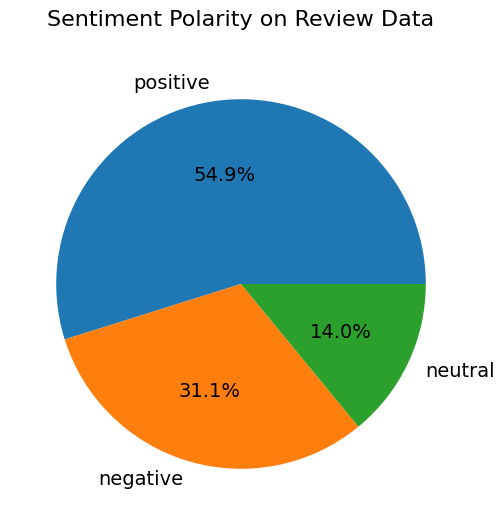

In [ ]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'df_labeling' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in df_labeling['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'df_labeling' dan menyimpannya dalam list 'labels'.
labels = list(df_labeling['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [ ]:
# Atur opsi tampilan agar kolom dapat menampilkan teks panjang
pd.set_option('display.max_colwidth', 3000)

def filter_sentiment_by_polarity(df, target_polarity):
    """
    Menyaring dan mengurutkan ulasan berdasarkan polaritas (positif, negatif, netral).

    Parameters:
    - df: DataFrame yang berisi kolom 'polarity', 'polarity_score', 'ulasan_lemmatize', dan 'ulasan_stopwords'.
    - target_polarity: string polaritas yang ingin difilter ('positive', 'negative', atau 'neutral').

    Returns:
    - DataFrame yang telah difilter dan diurutkan berdasarkan skor polaritas.
    """
    if target_polarity not in ['positive', 'negative', 'neutral']:
        raise ValueError("Polaritas harus 'positive', 'negative', atau 'neutral'")

    # Filter berdasarkan polaritas
    df_filtered = df[df['polarity'] == target_polarity]

    # Pilih kolom yang relevan
    df_filtered = df_filtered[['ulasan_lemmatize', 'polarity_score', 'polarity', 'ulasan_stopwords']]

    # Urutkan berdasarkan skor polaritas (semakin besar, semakin kuat positif/negatif)
    df_filtered = df_filtered.sort_values(by='polarity_score', ascending=False)

    # Reset index dan mulai dari 1
    df_filtered = df_filtered.reset_index(drop=True)
    df_filtered.index += 1

    return df_filtered

In [ ]:
ulasan_positif = filter_sentiment_by_polarity(df_labeling, 'positive')
ulasan_negatif = filter_sentiment_by_polarity(df_labeling, 'negative')
ulasan_netral  = filter_sentiment_by_polarity(df_labeling, 'neutral')

In [ ]:
def wordcloud_visualizate(df, judul='Word Cloud of Ulasan'):
    """
    Menampilkan Word Cloud berdasarkan kolom 'ulasan_lemmatize' dalam DataFrame.

    Parameters:
    - df: DataFrame yang berisi kolom teks (berisi list kata atau string).
    - judul: Judul yang akan ditampilkan pada word cloud.
    - kolom_teks: Nama kolom dalam DataFrame yang akan digunakan untuk membuat word cloud (default: 'ulasan_lemmatize').
    """
    list_words = ''
    df['ulasan_lemmatize_tokens'] = df['ulasan_lemmatize'].progress_apply(word_tokenize)

    # Gabungkan semua kata dari kolom ulasan menjadi satu string
    for ulasan in df['ulasan_lemmatize_tokens']:
        for word in ulasan:
            list_words += ' ' + word

    # Buat objek WordCloud
    wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

    # Tampilkan Word Cloud
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title(judul, fontsize=18)
    ax.imshow(wordcloud)
    ax.axis('off')
    fig.tight_layout(pad=0)
    plt.show()

    df.drop(columns=['ulasan_lemmatize_tokens'], inplace=True)

100%|██████████| 16091/16091 [00:01<00:00, 12479.73it/s]


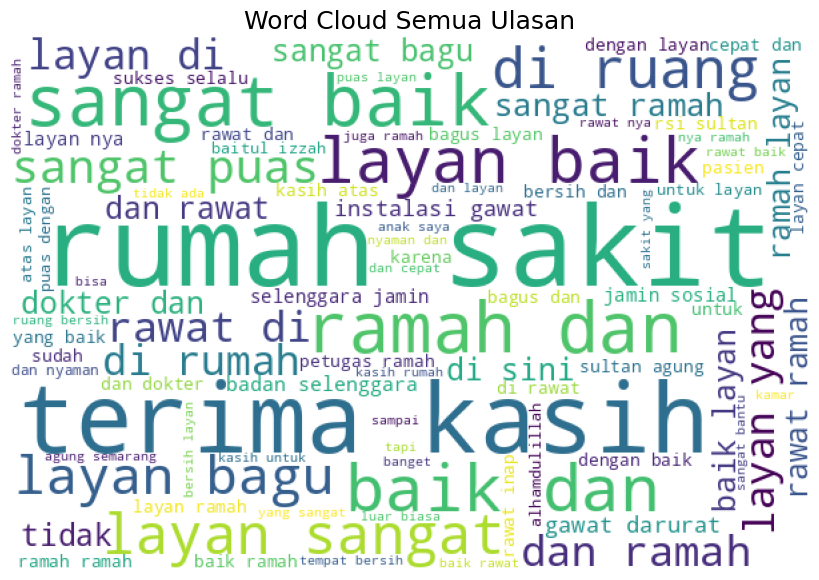

100%|██████████| 8826/8826 [00:01<00:00, 5733.34it/s]


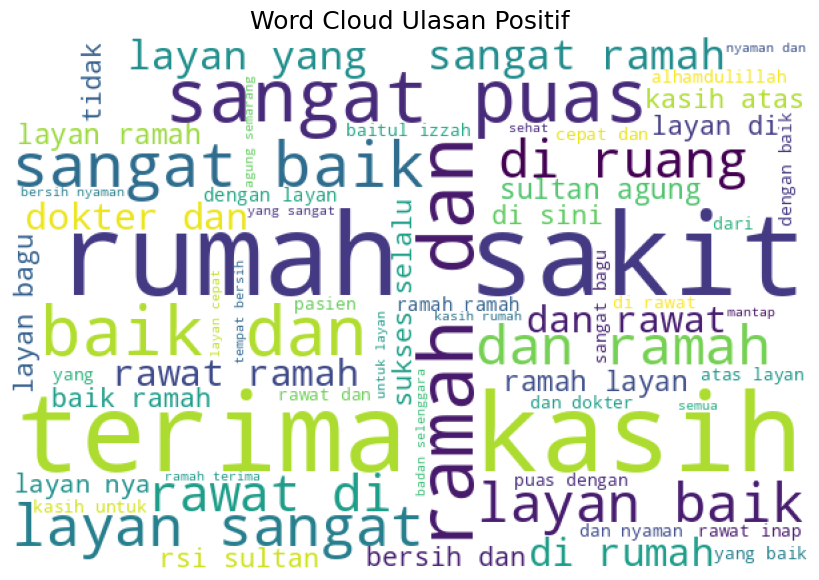

100%|██████████| 5006/5006 [00:00<00:00, 5839.34it/s]


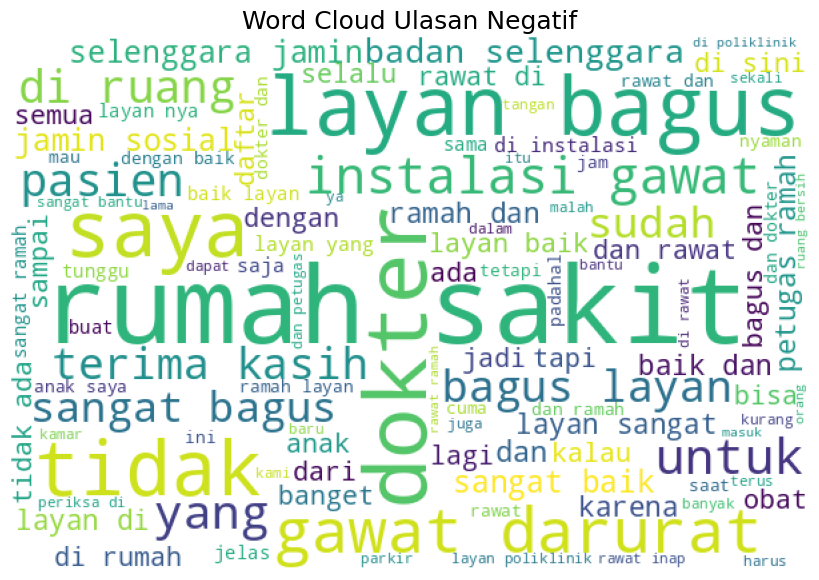

100%|██████████| 2259/2259 [00:00<00:00, 10243.15it/s]


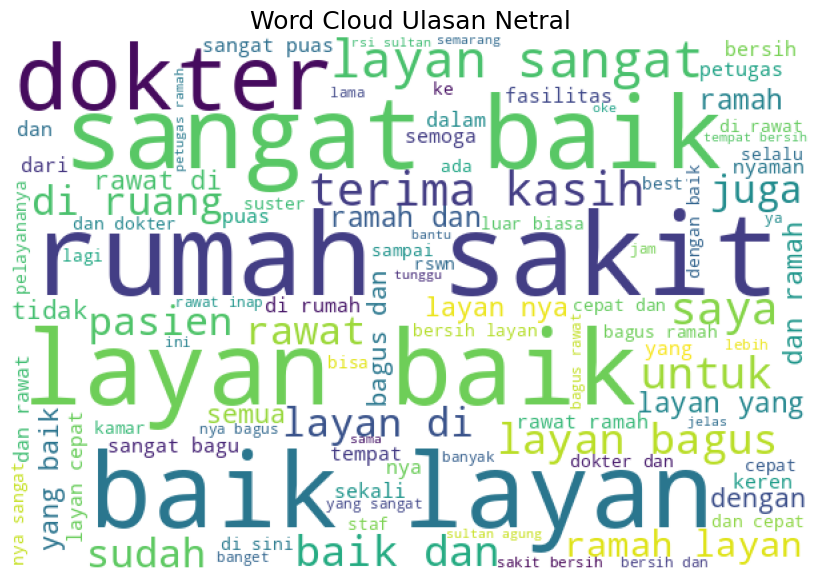

In [ ]:
# Word cloud dari semua ulasan (kolom 'ulasan_lemmatize')
wordcloud_visualizate(df, judul='Word Cloud Semua Ulasan')

# Word cloud dari ulasan positif
wordcloud_visualizate(ulasan_positif, judul='Word Cloud Ulasan Positif')

# Word cloud dari ulasan negatif
wordcloud_visualizate(ulasan_negatif, judul='Word Cloud Ulasan Negatif')

# Word cloud dari ulasan netral
wordcloud_visualizate(ulasan_netral, judul='Word Cloud Ulasan Netral')

# Emolex

In [ ]:
df_emolex = pd.read_csv('/content/drive/MyDrive/TA - Sentimen Analysis dan Opini Ulasan Rumah Sakit/new/data_labeling_sentiment.csv')
df_emolex.head()

,id_rs,rumah_sakit,tipe_rs,nama,ulasan,ulasan_casefolding,ulasan_tokenisasi,ulasan_normalisasi,ulasan_lemmatize,ulasan_stopwords,polarity_score,polarity
0,3374123,RS Dr. Amino Gondohutomo,A,bam Rustano,Dokter untu og ngamukan,dokter untu og ngamukan,"['dokter', 'untu', 'og', 'ngamukan']","['dokter', 'untu', 'og', 'gampang mengamuk']",dokter untu og gampang amuk,untu og gampang amuk,-3,negative
1,3374123,RS Dr. Amino Gondohutomo,A,Nike Dewanti,Setelah saya berkonsultasi dengan yg lebih pro...,setelah saya berkonsultasi dengan yg lebih pro...,"['setelah', 'saya', 'berkonsultasi', 'dengan',...","['setelah', 'saya', 'berkonsultasi', 'dengan',...",setelah saya konsultasi dengan yang lebih prof...,konsultasi profesional bantu paham,2,positive
2,3374123,RS Dr. Amino Gondohutomo,A,Claudia Noviantiy,Pelayanan sangat memuaskan,pelayanan sangat memuaskan,"['pelayanan', 'sangat', 'memuaskan']","['pelayanan', 'sangat', 'memuaskan']",layan sangat puas,layan puas,3,positive
3,3374123,RS Dr. Amino Gondohutomo,A,Ma'ruf Aji Nugroho,Itu keren,itu keren,"['itu', 'keren']","['itu', 'keren']",itu keren,keren,0,neutral
4,3374123,RS Dr. Amino Gondohutomo,A,Muhammad Yuga Syahputra,Nais banget!!,nais banget,"['nais', 'banget']","['nais', 'banget']",nais banget,nais banget,1,positive


In [ ]:
emolex_dict = pd.read_csv('/content/drive/MyDrive/TA - Sentimen Analysis dan Opini Ulasan Rumah Sakit/new/emolex.txt', sep='\t')
emolex_dict.head()

,English Word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,Indonesian Word
0,aback,0,0,0,0,0,0,0,0,0,0,kembali
1,abacus,0,0,0,0,0,0,0,0,0,1,sempoa
2,abandon,0,0,0,1,0,1,0,1,0,0,meninggalkan
3,abandoned,1,0,0,1,0,1,0,1,0,0,ditinggalkan
4,abandonment,1,0,0,1,0,1,0,1,1,0,pengabaian


In [ ]:
def get_emotion_scores(text, emolex_dict, emotions):
    """
    Menghitung skor emosi dari satu teks/token list berdasarkan emolex_dict.

    Parameters:
    - text: teks (string atau list token).
    - emolex_dict: DataFrame yang berisi lexicon emosi (harus punya kolom 'Indonesian Word', 'English Word', dan emosi).
    - emotions: List emosi yang akan dihitung.

    Returns:
    - Dictionary berisi skor untuk setiap emosi.
    """
    words = text if isinstance(text, list) else str(text).lower().split()
    scores = dict.fromkeys(emotions, 0)
    found_words = 0

    for word in words:
        matched = emolex_dict[
            (emolex_dict['Indonesian Word'] == word) |
            (emolex_dict['English Word'] == word)
        ]

        if not matched.empty:
            found_words += 1
            for emotion in emotions:
                value = matched[emotion].iloc[0]
                if pd.notnull(value):
                    scores[emotion] += value

    if found_words > 0:
        scores = {emotion: score / found_words for emotion, score in scores.items()}

    return scores

def analyze_emotions_lexicon(df, text_column, emolex_dict):
    """
    Menganalisis emosi pada kolom teks dan menambahkan skor emosi serta emosi dominan ke DataFrame.

    Parameters:
    - df: DataFrame ulasan.
    - text_column: Nama kolom yang berisi teks atau list token.
    - emolex_dict: Lexicon emosi (DataFrame).

    Returns:
    - DataFrame dengan kolom skor emosi dan 'dominant_emotion'.
    """
    emotions = ['anger', 'anticipation', 'disgust', 'fear',
                'joy', 'negative', 'positive', 'sadness',
                'surprise', 'trust']

    emotion_scores_df = df[text_column].progress_apply(lambda text: pd.Series(get_emotion_scores(text, emolex_dict, emotions)))

    result_df = pd.concat([df, emotion_scores_df], axis=1)

    result_df['dominant_emotion'] = result_df[emotions].apply(
        lambda row: 'neutral' if row.sum() == 0 else row.idxmax(), axis=1
    )

    return result_df

In [ ]:
# Lalu panggil fungsi utama:
df_emolex = analyze_emotions_lexicon(df_emolex, text_column='ulasan_lemmatize', emolex_dict=emolex_dict)

100%|██████████| 16091/16091 [14:07<00:00, 18.98it/s]


In [ ]:
# Tampilkan distribusi emosi dominan
print(df_emolex['dominant_emotion'].value_counts())

dominant_emotion
positive        9591
anticipation    1927
negative        1520
neutral          868
disgust          816
joy              452
trust            304
fear             299
surprise         243
anger             54
sadness           17
Name: count, dtype: int64


In [ ]:
df_emolex[['ulasan_lemmatize', 'polarity', 'dominant_emotion']].head()

,ulasan_lemmatize,polarity,dominant_emotion
0,dokter untu og gampang amuk,negative,positive
1,setelah saya konsultasi dengan yang lebih prof...,positive,positive
2,layan sangat puas,positive,disgust
3,itu keren,neutral,neutral
4,nais banget,positive,neutral


In [ ]:
df_emolex.to_csv('/content/drive/MyDrive/TA - Sentimen Analysis dan Opini Ulasan Rumah Sakit/new/data_labeling_sentiment_emotion.csv', index=False)

# Data Split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TA - Sentimen Analysis dan Opini Ulasan Rumah Sakit/new/data_labeling_sentiment_emotion.csv')
df.head()

,id_rs,rumah_sakit,tipe_rs,nama,ulasan,ulasan_casefolding,ulasan_tokenisasi,ulasan_normalisasi,ulasan_lemmatize,ulasan_stopwords,...,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,dominant_emotion
0,3374123,RS Dr. Amino Gondohutomo,A,bam Rustano,Dokter untu og ngamukan,dokter untu og ngamukan,"['dokter', 'untu', 'og', 'ngamukan']","['dokter', 'untu', 'og', 'gampang mengamuk']",dokter untu og gampang amuk,untu og gampang amuk,...,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,positive
1,3374123,RS Dr. Amino Gondohutomo,A,Nike Dewanti,Setelah saya berkonsultasi dengan yg lebih pro...,setelah saya berkonsultasi dengan yg lebih pro...,"['setelah', 'saya', 'berkonsultasi', 'dengan',...","['setelah', 'saya', 'berkonsultasi', 'dengan',...",setelah saya konsultasi dengan yang lebih prof...,konsultasi profesional bantu paham,...,0.0,0.166667,0.166667,0.0,0.166667,0.333333,0.166667,0.166667,0.166667,positive
2,3374123,RS Dr. Amino Gondohutomo,A,Claudia Noviantiy,Pelayanan sangat memuaskan,pelayanan sangat memuaskan,"['pelayanan', 'sangat', 'memuaskan']","['pelayanan', 'sangat', 'memuaskan']",layan sangat puas,layan puas,...,0.0,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.000000,disgust
3,3374123,RS Dr. Amino Gondohutomo,A,Ma'ruf Aji Nugroho,Itu keren,itu keren,"['itu', 'keren']","['itu', 'keren']",itu keren,keren,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
4,3374123,RS Dr. Amino Gondohutomo,A,Muhammad Yuga Syahputra,Nais banget!!,nais banget,"['nais', 'banget']","['nais', 'banget']",nais banget,nais banget,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [ ]:
X = df['ulasan_stopwords']
y = df['polarity']

In [ ]:
X

,ulasan_stopwords
0,untu og gampang amuk
1,konsultasi profesional bantu paham
2,layan puas
3,keren
4,nais banget
...,...
16086,periksa mata langsung janji daftar
16087,ramah
16088,terima kasih layan
16089,bagus


In [ ]:
y

,polarity
0,negative
1,positive
2,positive
3,neutral
4,positive
...,...
16086,negative
16087,positive
16088,positive
16089,negative


In [ ]:
y = y.map({'negative':0, 'neutral':1, 'positive':2})

In [ ]:
y

,polarity
0,0
1,2
2,2
3,1
4,2
...,...
16086,0
16087,2
16088,2
16089,0


# Pemodelan 1 (70/30 Train - Test , TF-IDF)

In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=2000, max_df=0.9)

# Fit dan transform pada data pelatihan
X_train_tfidf = tfidf.fit_transform(X_train)

# Transformasi data pengujian dengan TF-IDF yang sudah fit pada data pelatihan
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,ab,abai,abdi,abdul,abi,abimanyu,abses,ac,acara,acc,...,yoga,yosep,yoseph,yoyakarta,yudhistira,yudistira,yuli,yuni,yusuf,𝑚𝑒𝑛𝑦𝑒𝑛𝑎𝑛𝑔𝑘𝑎𝑛
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Naive Bayes

In [ ]:
# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
nb = MultinomialNB()

# Melatih model Naive Bayes pada data pelatihan
nb.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test_tfidf)

# Evaluate the model
print("Naive Bayes - Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes - Accuracy: 0.7323943661971831
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.66      0.74      1467
           1       0.73      0.06      0.11       709
           2       0.70      0.95      0.81      2652

    accuracy                           0.73      4828
   macro avg       0.75      0.56      0.55      4828
weighted avg       0.74      0.73      0.68      4828



Akurasi train Naive Bayes :  0.763562106010832
Akurasi test Naive Bayes :  0.7323943661971831


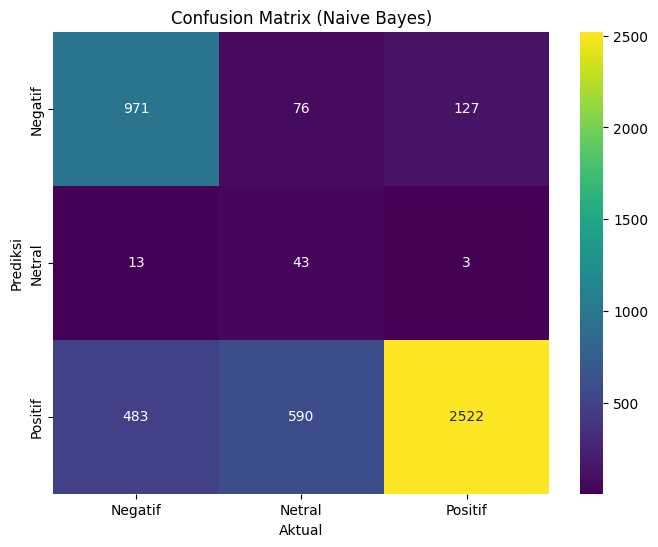

In [ ]:
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = nb.predict(X_train_tfidf)
y_pred_test_nb = nb.predict(X_test_tfidf)

# Evaluasi akurasi model nb
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)

print(f"Akurasi train Naive Bayes : ", accuracy_train_nb)
print(f"Akurasi test Naive Bayes : ", accuracy_test_nb)

# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_test_nb)

# Transpose confusion matrix agar aktual berada di kolom
cm_transposed = cm_nb.T

# Plot confusion matrix dengan urutan label yang benar
plt.figure(figsize=(8, 6))
sns.heatmap(cm_transposed, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

## SVM

In [ ]:
# Initialize and train the SVM model
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test_tfidf)

# Evaluate the model
print("SVM - Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM - Accuracy: 0.9053438276719138
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      1467
           1       0.84      0.68      0.75       709
           2       0.93      0.96      0.94      2652

    accuracy                           0.91      4828
   macro avg       0.89      0.85      0.87      4828
weighted avg       0.90      0.91      0.90      4828



Akurasi train SVM :  0.9476160880760011
Akurasi test SVM :  0.9053438276719138


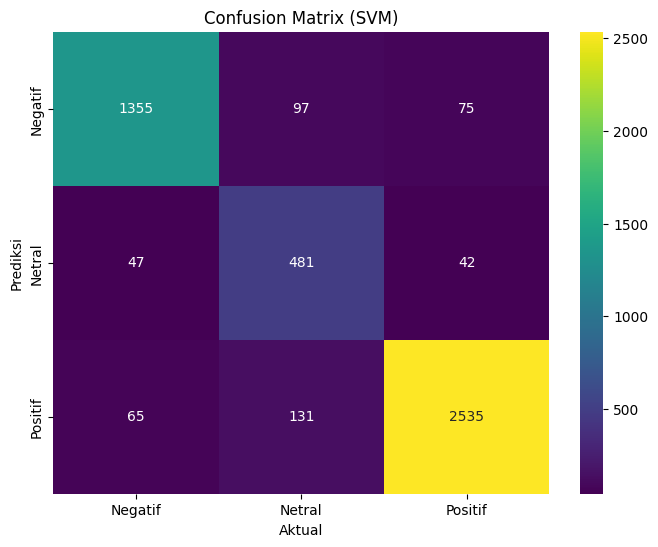

In [ ]:
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_svm = svm.predict(X_train_tfidf)


# Evaluasi akurasi model SVM
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
accuracy_test_svm = accuracy_score(y_test, y_pred_svm)

print(f"Akurasi train SVM : ", accuracy_train_svm)
print(f"Akurasi test SVM : ", accuracy_test_svm)

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Transpose confusion matrix agar aktual berada di kolom
cm_transposed = cm_svm.T

# Plot confusion matrix dengan urutan label yang benar
plt.figure(figsize=(8, 6))
sns.heatmap(cm_transposed, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Confusion Matrix (SVM)')
plt.show()

## Logistic Regression

In [ ]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression - Accuracy: 0.891880695940348
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1467
           1       0.89      0.55      0.68       709
           2       0.90      0.97      0.93      2652

    accuracy                           0.89      4828
   macro avg       0.89      0.81      0.84      4828
weighted avg       0.89      0.89      0.88      4828



Akurasi train Logistic Regression :  0.9275503862203676
Akurasi test Logistic Regression :  0.891880695940348


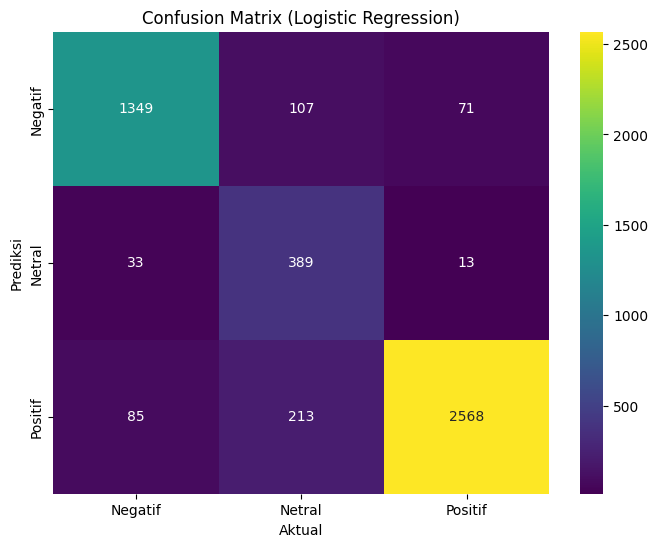

In [ ]:
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_log_reg = log_reg.predict(X_train_tfidf)


# Evaluasi akurasi model Logistic Regression
accuracy_train_log_reg = accuracy_score(y_train, y_pred_train_log_reg)
accuracy_test_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(f"Akurasi train Logistic Regression : ", accuracy_train_log_reg)
print(f"Akurasi test Logistic Regression : ", accuracy_test_log_reg)

# Confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Transpose confusion matrix agar aktual berada di kolom
cm_transposed = cm_log_reg.T

# Plot confusion matrix dengan urutan label yang benar
plt.figure(figsize=(8, 6))
sns.heatmap(cm_transposed, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


## Neural Networks (MLPClassifier)

In [ ]:
# Initialize and train the Neural Network model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
mlp.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_mlp = mlp.predict(X_test_tfidf)

# Evaluate the model
print("Neural Networks (MLP) - Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))

Neural Networks (MLP) - Accuracy: 0.9132145816072909
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      1467
           1       0.80      0.75      0.77       709
           2       0.94      0.96      0.95      2652

    accuracy                           0.91      4828
   macro avg       0.88      0.87      0.88      4828
weighted avg       0.91      0.91      0.91      4828



Akurasi train MLP :  0.9988457782118441
Akurasi test MLP :  0.9132145816072909


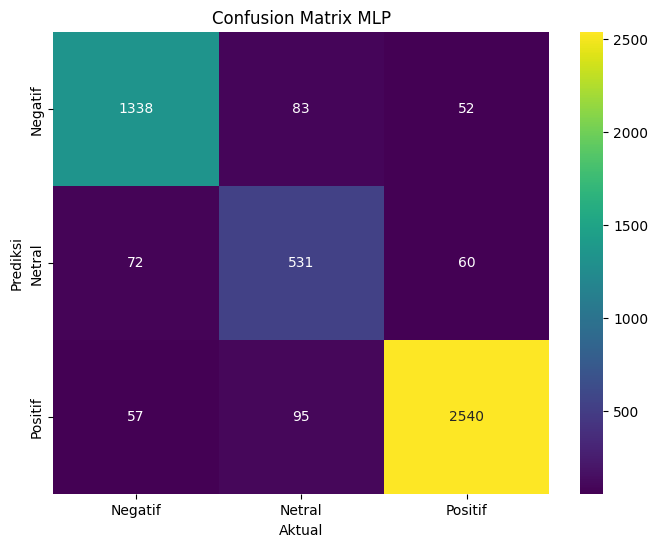

In [ ]:
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_mlp = mlp.predict(X_train_tfidf)

# Evaluasi akurasi model MLP
accuracy_train_mlp = accuracy_score(y_train, y_pred_train_mlp)
accuracy_test_mlp = accuracy_score(y_test, y_pred_mlp)

print(f"Akurasi train MLP : ", accuracy_train_mlp)
print(f"Akurasi test MLP : ", accuracy_test_mlp)

# Confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

# Transpose confusion matrix agar aktual berada di kolom
cm_transposed = cm_mlp.T

# Plot confusion matrix dengan urutan label yang benar
plt.figure(figsize=(8, 6))
sns.heatmap(cm_transposed, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Confusion Matrix MLP')
plt.show()


# Pemodelan 2 (80/20 Train - Test , TF-IDF)

In [ ]:
# Bagi data menjadi data latih dan data uji
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi TF-IDF Vectorizer
tfidf_v2 = TfidfVectorizer(max_features=2000, max_df=0.9)

# Fit dan transform pada data pelatihan
X_train_tfidf_v2 = tfidf_v2.fit_transform(X_train_v2)

# Transformasi data pengujian dengan TF-IDF yang sudah fit pada data pelatihan
X_test_tfidf_v2 = tfidf_v2.transform(X_test_v2)

## Naive Bayes

In [ ]:
# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
nb = MultinomialNB()

# Melatih model Naive Bayes pada data pelatihan
nb.fit(X_train_tfidf_v2, y_train_v2)

# Make predictions
y_pred_nb_v2 = nb.predict(X_test_tfidf_v2)

# Evaluate the model
print("Naive Bayes - Accuracy:", accuracy_score(y_test_v2, y_pred_nb_v2))
print("Classification Report:\n", classification_report(y_test_v2, y_pred_nb_v2))


Naive Bayes - Accuracy: 0.7297297297297297
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.67      0.74      1004
           1       0.66      0.06      0.11       473
           2       0.70      0.95      0.81      1742

    accuracy                           0.73      3219
   macro avg       0.73      0.56      0.55      3219
weighted avg       0.73      0.73      0.68      3219



Akurasi train Naive Bayes :  0.7617308887507769
Akurasi test Naive Bayes :  0.7297297297297297


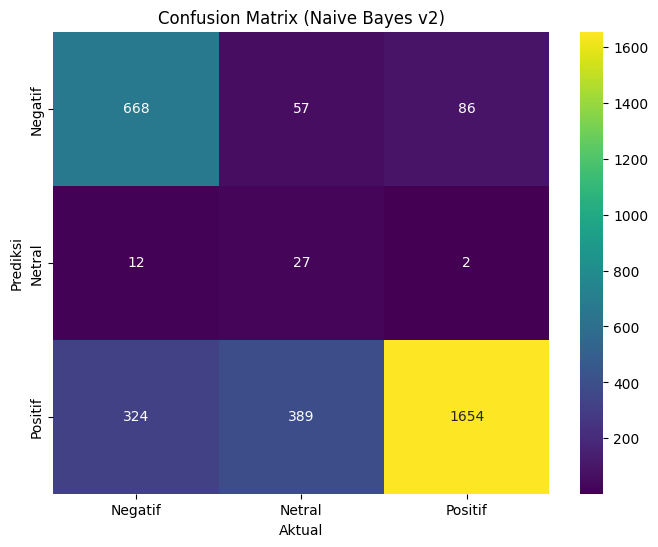

In [ ]:
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb_v2 = nb.predict(X_train_tfidf_v2)
y_pred_test_nb_v2 = nb.predict(X_test_tfidf_v2)

# Evaluasi akurasi model nb
accuracy_train_nb_v2 = accuracy_score(y_train_v2, y_pred_train_nb_v2)
accuracy_test_nb_v2 = accuracy_score(y_test_v2, y_pred_test_nb_v2)

print(f"Akurasi train Naive Bayes : ", accuracy_train_nb_v2)
print(f"Akurasi test Naive Bayes : ", accuracy_test_nb_v2)

# Confusion matrix
cm_nb_v2 = confusion_matrix(y_test_v2, y_pred_test_nb_v2)

# Transpose confusion matrix agar aktual berada di kolom
cm_transposed_v2 = cm_nb_v2.T

# Plot confusion matrix dengan urutan label yang benar
plt.figure(figsize=(8, 6))
sns.heatmap(cm_transposed_v2, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Confusion Matrix (Naive Bayes v2)')
plt.show()

## SVM

In [ ]:
# Initialize and train the SVM model
svm.fit(X_train_tfidf_v2, y_train_v2)

# Make predictions
y_pred_svm_v2 = svm.predict(X_test_tfidf_v2)

# Evaluate the model
print("SVM Model 2 - Accuracy:", accuracy_score(y_test_v2, y_pred_svm_v2))
print("Classification Report:\n", classification_report(y_test_v2, y_pred_svm_v2))

SVM Model 2 - Accuracy: 0.907735321528425
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1004
           1       0.84      0.70      0.77       473
           2       0.93      0.96      0.94      1742

    accuracy                           0.91      3219
   macro avg       0.89      0.86      0.87      3219
weighted avg       0.91      0.91      0.91      3219



Akurasi train SVM Model 2 :  0.9484928527035426
Akurasi test SVM Model 2:  0.907735321528425


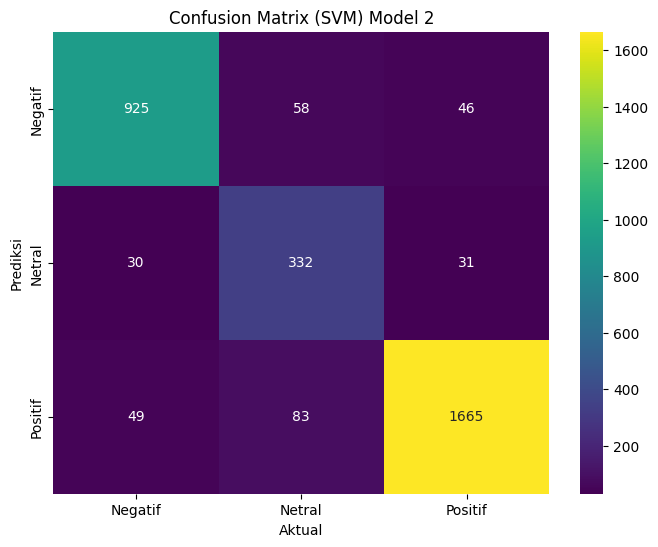

In [ ]:
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_svm_v2 = svm.predict(X_train_tfidf_v2)


# Evaluasi akurasi model SVM
accuracy_train_svm_v2 = accuracy_score(y_train_v2, y_pred_train_svm_v2)
accuracy_test_svm_v2 = accuracy_score(y_test_v2, y_pred_svm_v2)

print(f"Akurasi train SVM Model 2 : ", accuracy_train_svm_v2)
print(f"Akurasi test SVM Model 2: ", accuracy_test_svm_v2)

# Confusion matrix
cm_svm_v2 = confusion_matrix(y_test_v2, y_pred_svm_v2)

# Transpose confusion matrix agar aktual berada di kolom
cm_transposed = cm_svm_v2.T

# Plot confusion matrix dengan urutan label yang benar
plt.figure(figsize=(8, 6))
sns.heatmap(cm_transposed, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Confusion Matrix (SVM) Model 2')
plt.show()

## Logistic Regression

In [ ]:
# Initialize and train the Logistic Regression model
log_reg_v2 = LogisticRegression(max_iter=1000)
log_reg_v2.fit(X_train_tfidf_v2, y_train_v2)

# Make predictions
y_pred_log_reg_v2 = log_reg_v2.predict(X_test_tfidf_v2)

# Evaluate the model
print("Logistic Regression - Accuracy:", accuracy_score(y_test_v2, y_pred_log_reg_v2))
print("Classification Report:\n", classification_report(y_test_v2, y_pred_log_reg_v2))

Logistic Regression - Accuracy: 0.895309102205654
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      1004
           1       0.92      0.58      0.71       473
           2       0.89      0.97      0.93      1742

    accuracy                           0.90      3219
   macro avg       0.90      0.82      0.85      3219
weighted avg       0.90      0.90      0.89      3219



Akurasi train Logistic Regression :  0.9298477315102548
Akurasi test Logistic Regression :  0.895309102205654


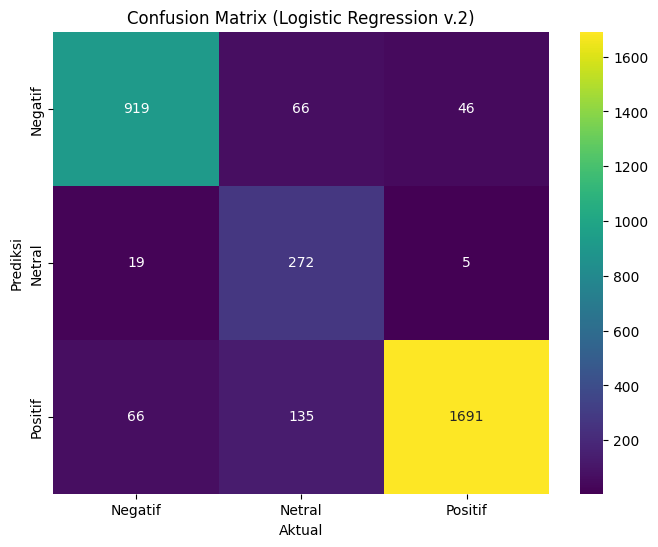

In [ ]:
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_log_reg_v2 = log_reg_v2.predict(X_train_tfidf_v2)


# Evaluasi akurasi model Logistic Regression
accuracy_train_log_reg_v2 = accuracy_score(y_train_v2, y_pred_train_log_reg_v2)
accuracy_test_log_reg_v2 = accuracy_score(y_test_v2, y_pred_log_reg_v2)

print(f"Akurasi train Logistic Regression : ", accuracy_train_log_reg_v2)
print(f"Akurasi test Logistic Regression : ", accuracy_test_log_reg_v2)

# Confusion matrix
cm_log_reg_v2 = confusion_matrix(y_test_v2, y_pred_log_reg_v2)

# Transpose confusion matrix agar aktual berada di kolom
cm_transposed_v2 = cm_log_reg_v2.T

# Plot confusion matrix dengan urutan label yang benar
plt.figure(figsize=(8, 6))
sns.heatmap(cm_transposed_v2, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Confusion Matrix (Logistic Regression v.2)')
plt.show()

# Pemodelan 3 (70/30 Train - Test , BoW)

In [ ]:
# Split data menjadi train dan test
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi CountVectorizer untuk BoW
vectorizer = CountVectorizer(max_features=5000)

In [ ]:
# Transformasi teks ke dalam bentuk BoW untuk data pelatihan dan pengujian
X_train_bow = vectorizer.fit_transform(X_train_v3)
X_test_bow = vectorizer.transform(X_test_v3)

## Logistic Regression

In [ ]:
# Melatih model Logistic Regression menggunakan data BoW
model_log_reg = LogisticRegression(max_iter=1000)
model_log_reg.fit(X_train_bow, y_train_v3)

# Melakukan prediksi pada data uji
y_pred_log_reg_v3 = model_log_reg.predict(X_test_bow)

In [ ]:
# Evaluasi model
accuracy_log_reg = accuracy_score(y_test_v3, y_pred_log_reg_v3)
print(f"Akurasi Logistic Regression: {accuracy_log_reg}")
print("Classification Report:\n", classification_report(y_test_v3, y_pred_log_reg_v3))

Akurasi Logistic Regression: 0.9030754892823858
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      1004
           1       0.86      0.66      0.75       473
           2       0.92      0.96      0.94      1742

    accuracy                           0.90      3219
   macro avg       0.89      0.85      0.86      3219
weighted avg       0.90      0.90      0.90      3219



Akurasi train Logistic Regression :  0.9526880049720323
Akurasi test Logistic Regression :  0.9030754892823858


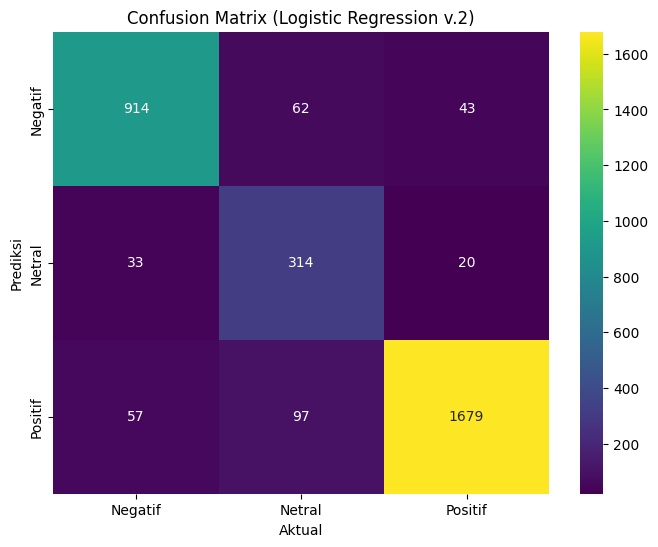

In [ ]:
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_log_reg_v3 = model_log_reg.predict(X_train_bow)


# Evaluasi akurasi model Logistic Regression
accuracy_train_log_reg_v3 = accuracy_score(y_train_v3, y_pred_train_log_reg_v3)
accuracy_test_log_reg_v3 = accuracy_score(y_test_v3, y_pred_log_reg_v3)

print(f"Akurasi train Logistic Regression : ", accuracy_train_log_reg_v3)
print(f"Akurasi test Logistic Regression : ", accuracy_test_log_reg_v3)

# Confusion matrix
cm_log_reg_v3 = confusion_matrix(y_test_v3, y_pred_log_reg_v3)

# Transpose confusion matrix agar aktual berada di kolom
cm_transposed_v3 = cm_log_reg_v3.T

# Plot confusion matrix dengan urutan label yang benar
plt.figure(figsize=(8, 6))
sns.heatmap(cm_transposed_v3, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Confusion Matrix (Logistic Regression v.2)')
plt.show()

## Naive Bayes

In [ ]:
# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
nb = MultinomialNB()

# Melatih model Naive Bayes pada data pelatihan
nb.fit(X_train_bow, y_train_v3)

# Make predictions
y_pred_nb_v3 = nb.predict(X_test_bow)

# Evaluate the model
print("Naive Bayes - Accuracy:", accuracy_score(y_test_v3, y_pred_nb_v3))
print("Classification Report:\n", classification_report(y_test_v3, y_pred_nb_v3))

Naive Bayes - Accuracy: 0.7260018639328985
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73      1004
           1       0.65      0.09      0.16       473
           2       0.70      0.93      0.80      1742

    accuracy                           0.73      3219
   macro avg       0.72      0.56      0.56      3219
weighted avg       0.72      0.73      0.68      3219



Akurasi train Naive Bayes :  0.7700435052827843
Akurasi test Naive Bayes :  0.7260018639328985


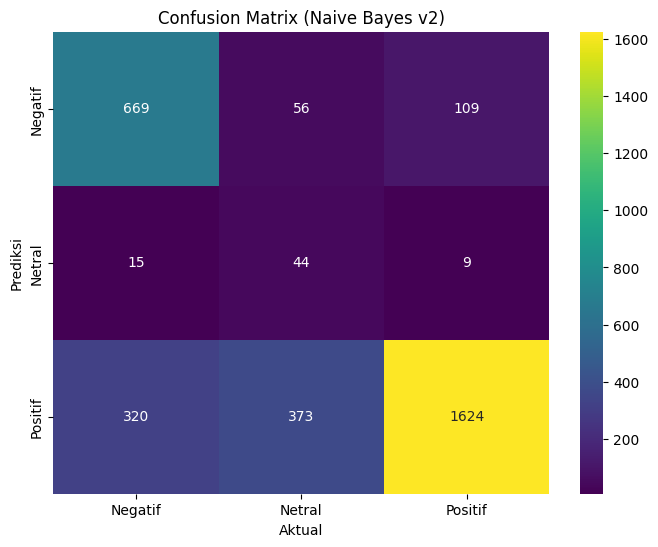

In [ ]:
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb_v3 = nb.predict(X_train_bow)
y_pred_test_nb_v3 = nb.predict(X_test_bow)

# Evaluasi akurasi model nb
accuracy_train_nb_v3 = accuracy_score(y_train_v3, y_pred_train_nb_v3)
accuracy_test_nb_v3 = accuracy_score(y_test_v3, y_pred_test_nb_v3)

print(f"Akurasi train Naive Bayes : ", accuracy_train_nb_v3)
print(f"Akurasi test Naive Bayes : ", accuracy_test_nb_v3)

# Confusion matrix
cm_nb_v3 = confusion_matrix(y_test_v3, y_pred_test_nb_v3)

# Transpose confusion matrix agar aktual berada di kolom
cm_transposed_v3 = cm_nb_v3.T

# Plot confusion matrix dengan urutan label yang benar
plt.figure(figsize=(8, 6))
sns.heatmap(cm_transposed_v3, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Confusion Matrix (Naive Bayes v2)')
plt.show()

# Evaluasi Hasil Akhir Model

In [ ]:
# Evaluasi hasil pemodelan 1
nama_model_v1 = ['Naive Bayes', 'SVM', 'Logistic Regression', 'MLPClassifier']
akurasi_v1 = [accuracy_test_nb, accuracy_test_svm, accuracy_test_log_reg, accuracy_test_mlp]

# Evaluasi hasil pemodelan 2
nama_model_v2 = ['Naive Bayes', 'Logistic Regression']
akurasi_v2 = [accuracy_test_nb_v2, accuracy_test_log_reg_v2]

# Evaluasi hasil pemodelna 3
nama_model_v3 = ['Naive Bayes', 'Logistic Regression']
akurasi_v3 = [accuracy_test_nb_v3, accuracy_test_log_reg_v3]


In [ ]:
# Membuat DataFrame
accuracy_comparison_df_v1 = pd.DataFrame({
    'Model': nama_model_v1,
    'Accuracy': akurasi_v1
})

# Menampilkan DataFrame
print(accuracy_comparison_df_v1)

                 Model  Accuracy
0          Naive Bayes  0.732394
1                  SVM  0.905344
2  Logistic Regression  0.891881
3        MLPClassifier  0.913215


In [ ]:
# Membuat DataFrame
accuracy_comparison_df_v2 = pd.DataFrame({
    'Model': nama_model_v2,
    'Accuracy': akurasi_v2
})

# Menampilkan DataFrame
print(accuracy_comparison_df_v2)

                 Model  Accuracy
0          Naive Bayes  0.729730
1  Logistic Regression  0.895309


In [ ]:
# Membuat DataFrame
accuracy_comparison_df_v3 = pd.DataFrame({
    'Model': nama_model_v3,
    'Accuracy': akurasi_v3
})

# Menampilkan DataFrame
print(accuracy_comparison_df_v3)

                 Model  Accuracy
0          Naive Bayes  0.726002
1  Logistic Regression  0.903075


# Inference Model

In [ ]:

# Text Testing
test_text = ["Pelayanan bagus, petugas ramah, lingkungan bersih dan fasikitas sangat memadai. terima kasih amino",
             "Sangat mrmbantu ketika berkonseling tentang psikis. Dokternya ramah dan mengerti apa yang kita rasakan.. memberikan win win solution agar kita bisa lebih semangat dalam mrnjalankan hari hari",
             "Sekarang sudah menerima pelayanan umum, spesialisnya udah banyak, saran yang mau lahiran disini juga bisa untuk persalinan eracs. Biaya eracs juga murah banget cuman ",
             "Terimakasih atas perawatannya utk adek saya,trimakasih buat ruang ripd dengan bpk. Arif dan bpk. Putra..",
             "Pelayanan sudah baik, kalo bisa ditambah WiFi di setiap ruangan",
             "Sangat puas banget pelayanannya bisa membantu bgt Sangat memuaskan pokoknya 😍😍 …",
             "Kamar yang saya tempati bau tidak terkondisi ada yang bocor",
             "Anak saya lumayan betah saat dirawat disini dan bisa cepat pulih dalam waktu 3 hari",
             "Pelayanan buruk dan fasilitas kurang lengkap"
            ]

# Text Preprocessing dengan list comprehension
text_clean = [single_preprocessing(text) for text in test_text]

# Ekstrak Fitur
text_extract = vectorizer.transform(text_clean)

# Modelling
text_predict = model_log_reg.predict(text_extract)

# Menampilkan hasil prediksi
sentiment_labels = ['Negatif', 'Netral', 'Positif']

# Menampilkan prediksi untuk setiap teks
for i, prediction in enumerate(text_predict):
    print(f"Text: '{test_text[i]}' => Predicted Sentiment: {sentiment_labels[prediction]}")


Text: 'Pelayanan bagus, petugas ramah, lingkungan bersih dan fasikitas sangat memadai. terima kasih amino' => Predicted Sentiment: Positif
Text: 'Sangat mrmbantu ketika berkonseling tentang psikis. Dokternya ramah dan mengerti apa yang kita rasakan.. memberikan win win solution agar kita bisa lebih semangat dalam mrnjalankan hari hari' => Predicted Sentiment: Positif
Text: 'Sekarang sudah menerima pelayanan umum, spesialisnya udah banyak, saran yang mau lahiran disini juga bisa untuk persalinan eracs. Biaya eracs juga murah banget cuman ' => Predicted Sentiment: Positif
Text: 'Terimakasih atas perawatannya utk adek saya,trimakasih buat ruang ripd dengan bpk. Arif dan bpk. Putra..' => Predicted Sentiment: Positif
Text: 'Pelayanan sudah baik, kalo bisa ditambah WiFi di setiap ruangan' => Predicted Sentiment: Negatif
Text: 'Sangat puas banget pelayanannya bisa membantu bgt Sangat memuaskan pokoknya 😍😍 …' => Predicted Sentiment: Positif
Text: 'Kamar yang saya tempati bau tidak terkondisi a